In [22]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Load data

df = pd.read_csv("AN19_individual_EPI.csv")

In [24]:
df

,Sample,Pooled,Year,SITE,TreatmentDay,GENE,G_annotation,COVERAGE,VAF,VF,SNP,TYPE
0,19ANBe00A0009PfFxxx0,individual,19,Benguela,0,DHFR,S108N,11,100.0%,11,108N,mutation
1,19ANBe00A0010PfFxxx0,individual,19,Benguela,0,DHFR,S108N,8,100.0%,8,108N,mutation
2,19ANBe00A0016PfFxxx0,individual,19,Benguela,0,DHFR,S108N,26,100.0%,26,108N,mutation
3,19ANBe00A0017PfFxxx0,individual,19,Benguela,0,DHFR,S108N,10,100.0%,10,108N,mutation
4,19ANBe00A0020PfFxxx0,individual,19,Benguela,0,DHFR,S108N,26,100.0%,26,108N,mutation
...,...,...,...,...,...,...,...,...,...,...,...,...
4938,19ANZa00A0208PfFxxx0,individual,19,Zaire,0,K13,I543T,100.5,0%,0,I543,wildtype
4939,19ANBe28A0031PfFxxx0,individual,19,Benguela,28,K13,C469F,101.0,0%,0,C469,wildtype
4940,19ANBe28A0031PfFxxx0,individual,19,Benguela,28,K13,C469Y,101.0,0%,0,C469,wildtype
4941,19ANZa00A0274PfFxxx0,individual,19,Zaire,0,K13,R515K,101.0,0%,0,R515,wildtype


In [25]:
df = df.infer_objects()

In [26]:
df.dtypes

Sample          object
Pooled          object
Year             int64
SITE            object
TreatmentDay     int64
GENE            object
G_annotation    object
COVERAGE        object
VAF             object
VF              object
SNP             object
TYPE            object
dtype: object

In [27]:
# Sort df by gene 

newlist=[]
for item in df['G_annotation'].tolist():
    #print(item[1:-1])
    newlist+=[int(item[1:-1])]
    
df['AAPOS'] = newlist

dict1={}
for item in df['G_annotation'].tolist():
    dict1[int(item[1:-1])]=item

#df['New_G']
#print(newlist)

#df.sort_values(by=['GENE','AAPOS'], ascending = (True, False))
#newlist2=[]

#df['AAPOS'].tolist()

#list1=df['AAPOS'].tolist()
list1=[]
for item in df['AAPOS'].tolist():
    list1+=[item]
list1.sort()
#print(list1)
newlist2=[]
for item in list1:
    #print(item[1:-1])
    newlist2+=[dict1[item]]
#newlist2    
#print(len(newlist2))
df['New_G']=newlist2
#print(newlist2)
#df.sort_values(['GENE','AAPOS'],ascending=False).groupby('GENE').head(3)


In [28]:
# Set style 
sns.set_style("whitegrid")

# Set plot/figure size 
sns.set(rc = {'figure.figsize':(20,14)})

#Create custom palette based on categorical data 
my_pal = {"Fail":"#ef9300", "Pass":"#32b67a"}

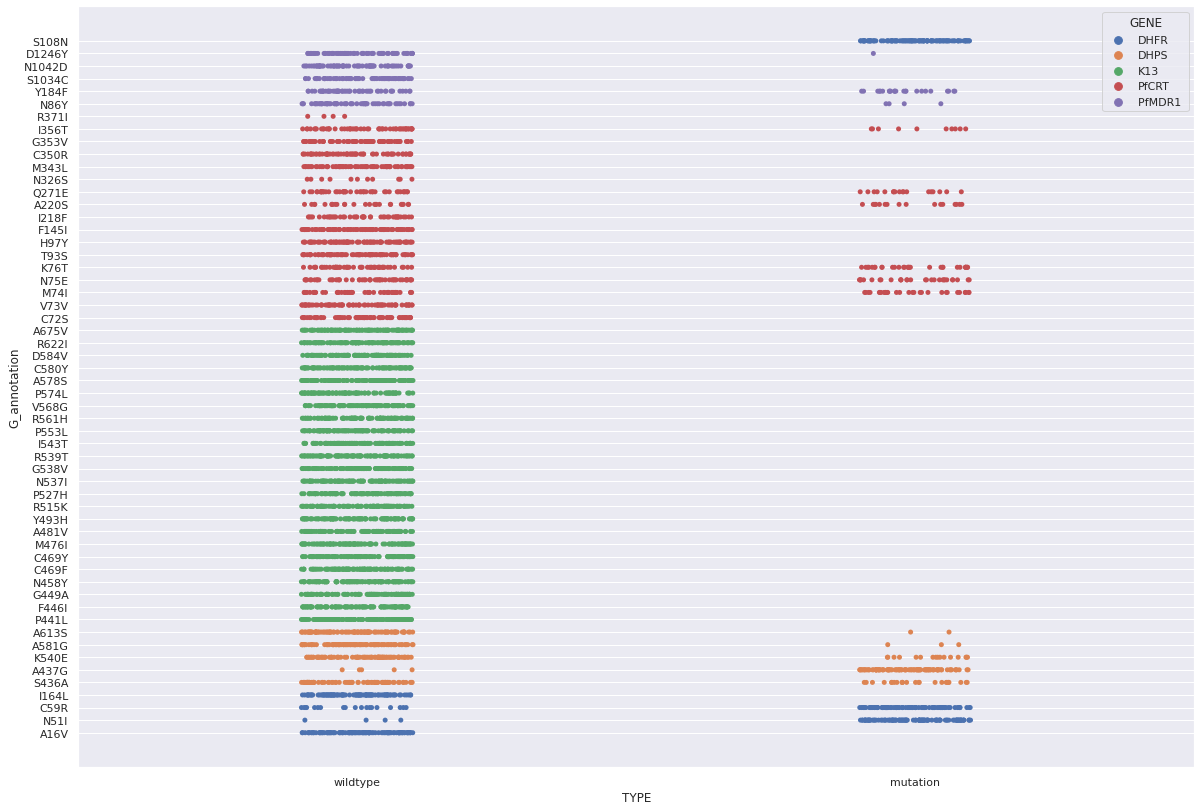

In [29]:
# Draw plots and sort by Gene
g= sns.stripplot(x="TYPE", y="G_annotation", hue="GENE", data=df.sort_values(['GENE','AAPOS'],ascending=(True,True)))

#g= sns.stripplot(x="TYPE", y="G_annotation", hue="GENE", data=df)

In [13]:
# Save figure and specify 
plt.savefig('ind_seq_results.pdf')
            
# plt.savefig('Figure_1.png', dpi=600, bbox_inches='tight')

# Display figure
plt.show()

<Figure size 1440x1008 with 0 Axes>

In [18]:
df.head()


,Document Name,Sequence Name,SITE,TreatmentDay,Pooled,Year,Coverage,Variant Frequency,Variant Raw Frequency,TrackerSNP,TYPE,SNP,AAPOS,New_G
0,19ANBe00A0009PfFxxx0_S1_L001_R_001 (trimmed) DHFR,DHFR,Benguela,0,individual,19,11,100.0%,11,S108N,mutation,108N,108,A16V
1,19ANBe00A0010PfFxxx0_S2_L001_R_001 (trimmed) DHFR,DHFR,Benguela,0,individual,19,8,100.0%,8,S108N,mutation,108N,108,A16V
2,19ANBe00A0016PfFxxx0_S3_L001_R_001 (trimmed) DHFR,DHFR,Benguela,0,individual,19,26,100.0%,26,S108N,mutation,108N,108,A16V
3,19ANBe00A0017PfFxxx0_S4_L001_R_001 (trimmed) DHFR,DHFR,Benguela,0,individual,19,10,100.0%,10,S108N,mutation,108N,108,A16V
4,19ANBe00A0020PfFxxx0_S5_L001_R_001 (trimmed) DHFR,DHFR,Benguela,0,individual,19,26,100.0%,26,S108N,mutation,108N,108,A16V
